Centroid1:  0.1 , 0.6
Centroid2:  0.3 , 0.2
New centroids: [(0.148, 0.712), (0.24666666666666667, 0.20000000000000004)]
New labels:  [1, 1, 1, 1, 2, 1, 2, 2]
Old labels:  [0, 0, 0, 0, 0, 0, 0, 0]
Centroid1:  0.148 , 0.712
Centroid2:  0.24666666666666667 , 0.20000000000000004
New centroids: [(0.1225, 0.765), (0.2475, 0.275)]
New labels:  [1, 1, 1, 1, 2, 2, 2, 2]
Old labels:  [1, 1, 1, 1, 2, 1, 2, 2]
Centroid1:  0.1225 , 0.765
Centroid2:  0.2475 , 0.275
New centroids: [(0.1225, 0.765), (0.2475, 0.275)]
New labels:  [1, 1, 1, 1, 2, 2, 2, 2]
Old labels:  [1, 1, 1, 1, 2, 2, 2, 2]
Final centroid:  [(0.1225, 0.765), (0.2475, 0.275)]
Final labels [1, 1, 1, 1, 2, 2, 2, 2]


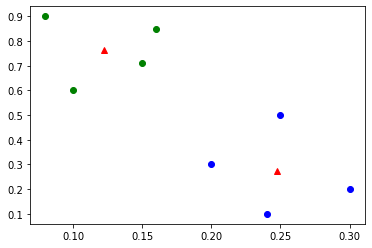

In [7]:
import matplotlib.pyplot as plt
import math

def manhattan_distance(x1,y1,x2,y2):
    return math.fabs(x1-x2)+math.fabs(y1-y2)

def assign_labels(datapoints,centroids,labels):
    #Check the distance from each point to centroids and assign labels

    #Getting centroid coordinates
    C1_x=centroids[0][0]
    C1_y=centroids[0][1]

    C2_x=centroids[1][0]
    C2_y=centroids[1][1]

    print("Centroid1: ",C1_x,",",C1_y)
    print("Centroid2: ",C2_x,",",C2_y)

    i=0
    for point in datapoints:
        x=point[0]
        y=point[1]
        
        #get distance from both Centroids of the current point
        dist1=manhattan_distance(x,y,C1_x,C1_y)
        dist2=manhattan_distance(x,y,C2_x,C2_y)

        #after getting both distance, see which is smaller and assign label
        if(dist1<dist2):
            labels[i]=1
        else:
            labels[i]=2
        i+=1

def get_new_centroids(points,labels):
    #define len1,len2
    len1=len2=0

    #define sum for both cluster1 & cluster2
    sum_x1=sum_y1=0
    sum_x2=sum_y2=0

    #go thru all points at once
    # and acc. to label add into len & specific x and y variables
    index=0
    for point in points:
        x=point[0]
        y=point[1]

        if labels[index]==1:
            len1+=1
            sum_x1+=x
            sum_y1+=y
        else:
            len2+=1
            sum_x2+=x
            sum_y2+=y
        index+=1

    #add all x and y points, divide by length to get mean
    # and then return mean
    new_C1_x=sum_x1/len1
    new_C1_y=sum_y1/len1

    new_C2_x=sum_x2/len2
    new_C2_y=sum_y2/len2

    new_C1=(new_C1_x,new_C1_y)
    new_C2=(new_C2_x,new_C2_y)

    return (new_C1,new_C2)

def KMeans(datapoints,centroids,labels,old_labels):
    #go in while loop till the labels don't change in an iteration
    while(labels!=old_labels):
        #copy the old_labels by labels.copy for further comparison
        #  in while loop
        old_labels=labels.copy()

        #assign initial labels
        assign_labels(datapoints,centroids,labels)

        # Now calculate new centroids from the current labels
        #   to get cluster
        centroids[0],centroids[1]=get_new_centroids(datapoints,labels)

        print("New centroids:",centroids)
        print("New labels: ",labels)
        print("Old labels: ",old_labels)

#datapoints
datapoints = [
  (0.1,0.6),
  (0.15,0.71),
  (0.08,0.9),
  (0.16, 0.85),
  (0.2,0.3),
  (0.25,0.5),
  (0.24,0.1),
  (0.3,0.2)
]
#initial centroids
centroids = [
  (0.1,0.6),
  (0.3,0.2)
]

#Init list of labels of size 8 with all 8 zeros
#Init old_labels with size 8 and all -1
#labels=[0,0,0,0,0,0,0,0]
labels=[0]*8
old_labels=[-1]*8

KMeans(datapoints,centroids,labels,old_labels)

print("Final centroid: ",centroids)
print("Final labels",labels)

#Divide into co-ordinate list for plotting
x=[d[0] for d in datapoints]
y=[d[1] for d in datapoints]

x2 = []
y2 = []
x1 = []
y1 = []
for pt,label in zip(datapoints,labels):
    if label == 1:
        x1.append(pt[0])
        y1.append(pt[1])
    else:
        x2.append(pt[0])
        y2.append(pt[1])        

xc=[c[0] for c in centroids]
yc=[c[1] for c in centroids]

# plt.scatter(x,y)
plt.scatter(x1,y1,color="green")
plt.scatter(x2,y2,color="blue")
plt.plot(xc,yc,"^",color="red")
plt.show()